In [12]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_boston
import seaborn as sns
import pickle

In [13]:
boston = load_boston()
bos = pd.DataFrame(boston.data, columns = boston.feature_names)
bos['MEDV'] = boston.target

In [14]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [15]:
bos.shape

(506, 14)

In [16]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


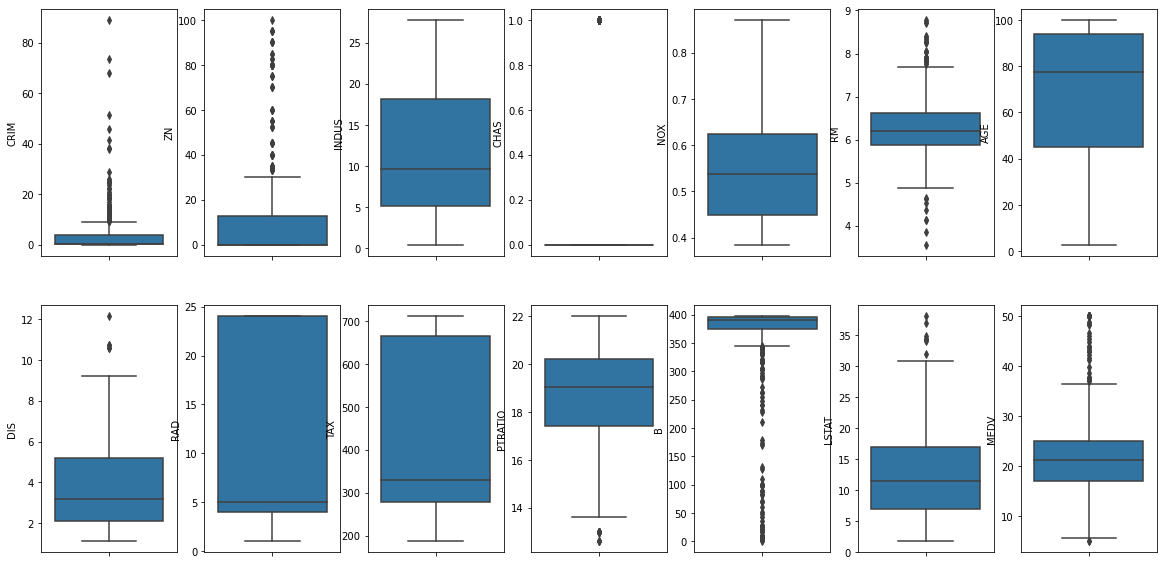

In [17]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in bos.items():
    sns.boxplot(y=k, data=bos, ax=axs[index])
    index += 1

In [18]:
for i, v in bos.items():
    iqr = v.quantile(0.75) - v.quantile(0.25)
    val = v[(v >= v.quantile(0.75)+ 1.5*iqr) | (v<= v.quantile(0.25) - 1.5*iqr)]
    perc = (val.shape[0]/v.shape[0])*100
    print(f'Outliers in {i} is {perc}%')

Outliers in CRIM is 13.043478260869565%
Outliers in ZN is 13.438735177865613%
Outliers in INDUS is 0.0%
Outliers in CHAS is 100.0%
Outliers in NOX is 0.0%
Outliers in RM is 5.928853754940711%
Outliers in AGE is 0.0%
Outliers in DIS is 0.9881422924901186%
Outliers in RAD is 0.0%
Outliers in TAX is 0.0%
Outliers in PTRATIO is 2.9644268774703555%
Outliers in B is 15.217391304347828%
Outliers in LSTAT is 1.383399209486166%
Outliers in MEDV is 7.905138339920949%


C:\Users\bijoy\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\bijoy\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\bijoy\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

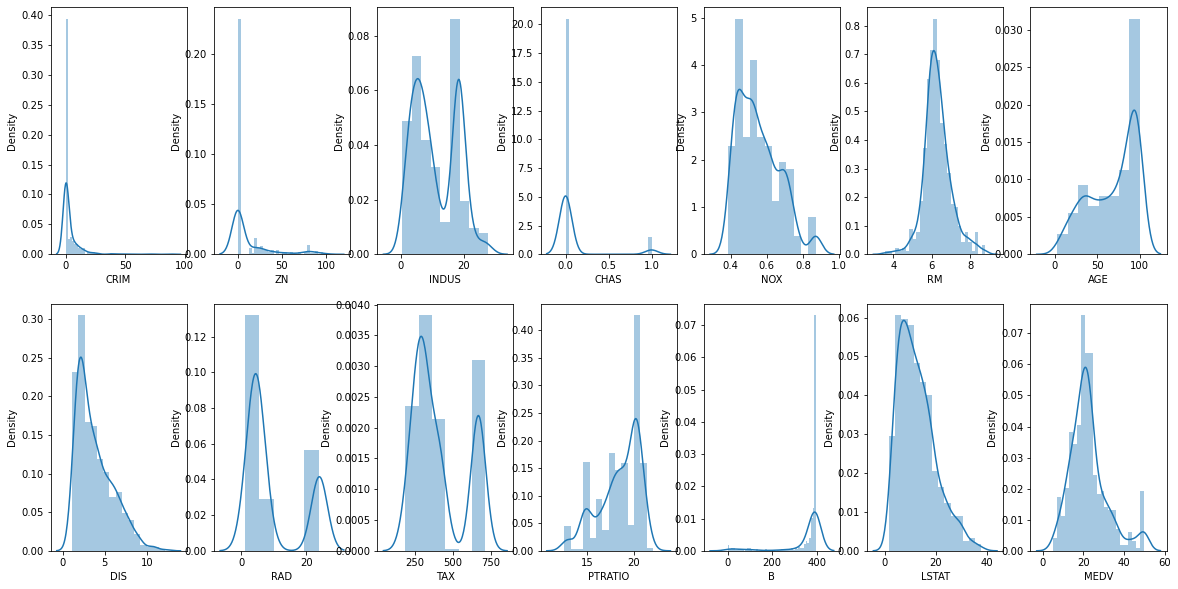

In [19]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in bos.items():
    sns.distplot(v, ax=axs[index])
    index += 1




<AxesSubplot:>

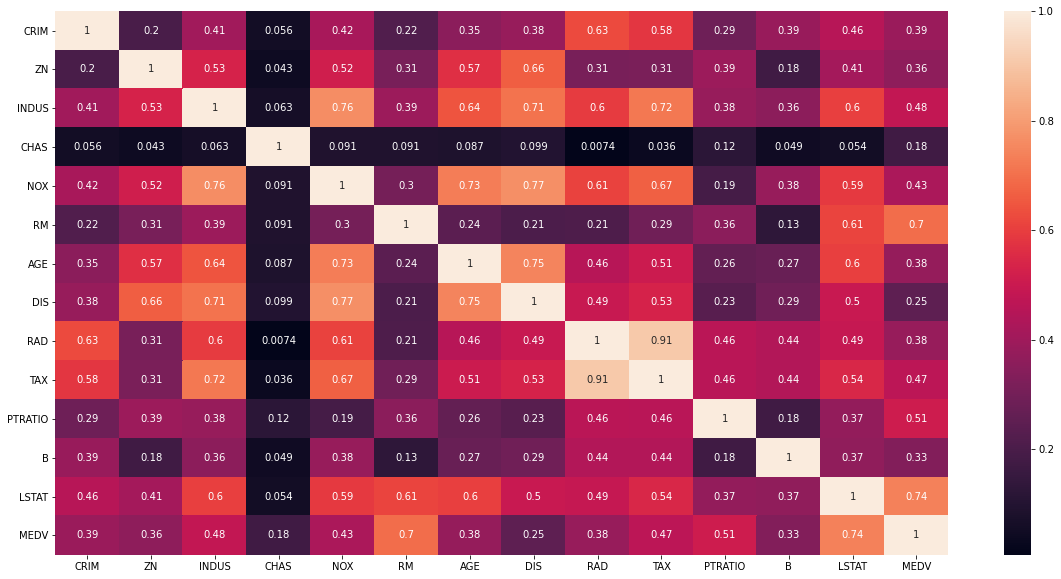

In [20]:
plt.figure(figsize=(20, 10))
sns.heatmap(bos.corr().abs(),  annot=True)



In [ ]:
Feature 0: 89.486115 CRIM
Feature 1: 75.257642 ZN
Feature 2: 153.954883 INDUS
Feature 3: 15.971512 CHAS
Feature 4: 112.591480 NOX
Feature 5: 471.846740 RM
Feature 6: 83.477459 AGE
Feature 7: 33.579570 DIS
Feature 8: 85.914278 RAD
Feature 9: 141.761357 TAX
Feature 10: 175.105543 PTRATIO
Feature 11: 63.054229 B



In [11]:
columns_drop = ['TAX','MEDV','CRIM','ZN','RAD','B', 'CHAS']
columns = [i for i in bos.columns if i not in columns_drop]
#x = bos.loc[:,column_sets]
x = bos.drop(columns_drop, axis=1)
y = bos['MEDV']
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state=0)
x_train

,INDUS,NOX,RM,AGE,DIS,PTRATIO,LSTAT
245,5.86,0.431,5.605,70.2,7.9549,19.1,18.46
59,5.13,0.453,5.927,47.2,6.9320,19.7,9.22
276,6.41,0.447,7.267,49.0,4.7872,17.6,6.05
395,18.10,0.693,6.471,98.8,1.7257,20.2,17.12
416,18.10,0.679,6.782,90.8,1.8195,20.2,25.79
...,...,...,...,...,...,...,...
323,7.38,0.493,5.708,74.3,4.7211,19.6,11.74
192,3.44,0.437,7.178,26.3,6.4798,15.2,2.87
117,10.01,0.547,6.021,82.6,2.7474,17.8,10.30
47,6.91,0.448,6.030,85.5,5.6894,17.9,18.80


In [12]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='median')
imp_mean.fit(x_train)

SimpleImputer(strategy='median')

In [13]:
with open('simpleImputer.sav','wb') as f:
    pickle.dump(imp_mean,f)

In [ ]:


from sklearn import preprocessing
min_max_scaler = preprocessing.StandardScaler()
column_sets = ['LSTAT','NOX', 'PTRATIO','TAX', 'RM']
columns_drop = ['TAX','MEDV','CRIM','ZN','RAD','B', 'CHAS']
columns = [i for i in bos.columns if i not in columns_drop]
#x = bos.loc[:,column_sets]
x = bos.drop(columns_drop, axis=1)
y = bos['MEDV']
x = min_max_scaler.fit_transform(x)
x_df = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=columns)
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(columns):
    sns.regplot(y=y, x=x_df[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)



In [29]:
bos.drop(columns_drop, axis=1)

,INDUS,NOX,RM,AGE,DIS,PTRATIO,LSTAT
0,2.31,0.538,6.575,65.2,4.0900,15.3,4.98
1,7.07,0.469,6.421,78.9,4.9671,17.8,9.14
2,7.07,0.469,7.185,61.1,4.9671,17.8,4.03
3,2.18,0.458,6.998,45.8,6.0622,18.7,2.94
4,2.18,0.458,7.147,54.2,6.0622,18.7,5.33
...,...,...,...,...,...,...,...
501,11.93,0.573,6.593,69.1,2.4786,21.0,9.67
502,11.93,0.573,6.120,76.7,2.2875,21.0,9.08
503,11.93,0.573,6.976,91.0,2.1675,21.0,5.64
504,11.93,0.573,6.794,89.3,2.3889,21.0,6.48


In [182]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = x

vif = pd.DataFrame()

vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]

vif["Features"] = columns

In [183]:
vif

,VIF,Features
0,10.507815,INDUS
1,1.127799,CHAS
2,11.373835,NOX
3,13.095830,RM
4,18.078903,AGE
5,5.121964,DIS
6,9.763241,PTRATIO
7,8.185603,LSTAT


In [4]:
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LinearRegression
from sklearn.model_selection import train_test_split

In [5]:
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state=0)

In [6]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [22]:
lasscv = LassoCV(alphas = None,cv =10, max_iter = 100000, normalize = True)
lasscv.fit(x_train, y_train)

LassoCV(cv=10, max_iter=100000, normalize=True)

In [23]:
# best alpha parameter
alpha = lasscv.alpha_
alpha

0.003845586184175237

In [24]:
lr = Lasso(alpha)
lr.fit(x_train, y_train)

Lasso(alpha=0.003845586184175237)

In [7]:
def adj_r2(x,y):
    r2 = lr.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [21]:
with open('linearRegressor.sav','wb') as f:
    pickle.dump(lr,f)

In [8]:
lr.score(x_train, y_train)

0.7443711775612982

In [9]:
adj_r2(x_train, y_train)

0.7395479922322661

In [10]:
pred = lr.predict(x_test)

In [11]:
pred

array([28.20980359, 23.20879619, 26.56072341, 12.34015624, 22.63127817,
       20.01236883, 19.60121902, 21.17934001, 19.39704963, 23.36787526,
       14.33231707, 18.431709  , 16.13468038,  4.90953566, 39.12741023,
       32.76925714, 21.77616894, 37.00763272, 32.03087192, 23.4844815 ,
       25.38963076, 25.42245156, 21.02309843, 29.27341767, 22.86416382,
       11.39897835, 17.86205377, 19.11232228, 37.56480135, 21.47563046,
       17.35654192, 16.61655476, 20.23699631, 23.48614377, 29.67895693,
       15.5610449 , 10.98014287, 21.73715627, 18.92362357, 14.26798926,
       26.89090069, 21.03689704, 25.58801953, 14.51175338, 26.99820816,
       26.00350909, 20.2137615 , 21.00627728,  8.61376297, 25.27831057,
       21.241476  , 17.48696657, 24.40272374, 31.39417924, 14.29669603,
       21.75007784, 21.21982011, 17.99827511, 21.34791719, 19.31074875,
       18.96343758, 21.9106206 , 32.94353322, 31.77500416, 17.38929517,
       33.61691523, 17.4984381 , 19.55261888, 20.09021092, 23.02

In [17]:
df['pred'] = pred

<ipython-input-17-70e60d9a03ae>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pred'] = pred


In [18]:
df.to_csv('bruh2.csv')

In [22]:
reg = None
with open('linearRegressor.sav','rb') as f:
    reg = pickle.load(f)

In [23]:
reg.score(x_test, y_test)

0.5884632974770854

In [20]:
lr.score(x_test, y_test)

0.5884632974770854

In [28]:
adj_r2(x_test, y_test)

0.5643356372905004

In [130]:

# pearson's correlation feature selection for numeric input and numeric output
from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
# generate dataset
x = bos.iloc[:,:-1]
y = bos['MEDV']
# define feature selection
fs = SelectKBest(score_func=f_regression, k=10)
# apply feature selection
X_selected = fs.fit_transform(x, y)
for i in range(len(fs.scores_)):
	print(f'Feature %d: %f {bos.columns[i]}' % (i, fs.scores_[i]))

Feature 0: 89.486115 CRIM
Feature 1: 75.257642 ZN
Feature 2: 153.954883 INDUS
Feature 3: 15.971512 CHAS
Feature 4: 112.591480 NOX
Feature 5: 471.846740 RM
Feature 6: 83.477459 AGE
Feature 7: 33.579570 DIS
Feature 8: 85.914278 RAD
Feature 9: 141.761357 TAX
Feature 10: 175.105543 PTRATIO
Feature 11: 63.054229 B
Feature 12: 601.617871 LSTAT


In [171]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from matplotlib import pyplot
 
# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select all features
	fs = SelectKBest(score_func=mutual_info_regression, k='all')
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs
x = bos.iloc[:,:-1]
y = bos['MEDV']

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
	print(f'Feature %d: %f {bos.columns[i]}' % (i, fs.scores_[i]))

Feature 0: 0.322266 CRIM
Feature 1: 0.195102 ZN
Feature 2: 0.507911 INDUS
Feature 3: 0.009071 CHAS
Feature 4: 0.441505 NOX
Feature 5: 0.487666 RM
Feature 6: 0.340658 AGE
Feature 7: 0.290024 DIS
Feature 8: 0.211142 RAD
Feature 9: 0.342628 TAX
Feature 10: 0.453717 PTRATIO
Feature 11: 0.174070 B
Feature 12: 0.694568 LSTAT
